<a href="https://colab.research.google.com/github/dmorton714/Expenditures-Data-For-Fiscal-Year-2023/blob/main/Expenditures_Data_For_Fiscal_Year_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/dmorton714/Expenditures-Data-For-Fiscal-Year-2023/main/Louisville_Metro_KY_-_Expenditures_Data_For_Fiscal_Year_2023.csv")

<ipython-input-28-423f93662a2a>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/dmorton714/Expenditures-Data-For-Fiscal-Year-2023/main/Louisville_Metro_KY_-_Expenditures_Data_For_Fiscal_Year_2023.csv")


In [29]:
columns_to_drop = ['fiscal_year', 'invoice_date', 'invoice_number', 'invoice_amount']
df = df.drop(columns=columns_to_drop)
df.head()

,payee,payment_date,payment_number,agency,expenditure_type,expenditure_category,spend_category,cost_center,project,program,grant_,fund,financing_source,region,extended_amount
0,Employee: Margaret Fixler,1/5/2023,ER00001727,Louisville Free Public Library,Operating,Local Travel Expense,Mileage - GSA,730 Southwest,NaN,NaN,NaN,1101 General Fund,NaN,NaN,8.31
1,Employee: David James,1/11/2023,ER00001790,Metro Council,Operating,Travel Expense,Travel Per Diem (GSA)- Meals,105 Metro Council Administration,NaN,NaN,NaN,1101 General Fund,NaN,NaN,48.00
2,Employee: Bryan Edelen,1/13/2023,ER00001808,Louisville Metro Police Department,Operating,Travel Expense,Travel Per Diem (GSA)- Meals,305 LMPD Training,NaN,NaN,NaN,1101 General Fund,NaN,NaN,44.25
3,Employee: Margaret Fixler,1/5/2023,ER00001727,Louisville Free Public Library,Operating,Local Travel Expense,Mileage - GSA,730 Southwest,NaN,NaN,NaN,1101 General Fund,NaN,NaN,5.00
4,A&F Siempre LLC,3/23/2023,AD_HOC_PAYMENT-3-5162,Economic Development,Capital,NaN,Non-Forgivable Loans,505 Econ Dev Loan Administration,KEOZ Grant METCO Loan Fund,NaN,GR00000163 METCO Loan Disbursements State Fund,Grant Fund,State Fund,NaN,224600.00


In [30]:
df['payee'].value_counts()

LOUISVILLE GAS & ELECTRIC COMPANY    39501
D-C ELEVATOR COMPANY INC              5494
BRODART CO                            2888
GALLS PARENT HOLDINGS LLC             1030
LOUISVILLE WATER COMPANY              1003
                                     ...  
AMZN MKTP US 400391WE3                   1
AMZN MKTP US C70000583                   1
PROCLIP USA LLC                          1
AMZN MKTP US L78AH7V93                   1
NORFOLK SOUTHERN CORPORATION             1
Name: payee, Length: 11219, dtype: int64

In [36]:
df = df.sort_values(by='extended_amount', ascending=False)
df.head(1)

,payee,payment_date,payment_number,agency,expenditure_type,expenditure_category,spend_category,cost_center,project,program,grant_,fund,financing_source,region,extended_amount
63856,LOUISVILLE ARENA AUTHORITY INC,10/31/2022,NaN,OMB Finance,Operating,NaN,External Agency Contract,210 General Adjustments,NaN,NaN,NaN,1101 General Fund,NaN,NaN,12000000.0


In [37]:
police = df[df.apply(lambda row: row.str.contains('police', case=False).any(), axis=1)]
police

,payee,payment_date,payment_number,agency,expenditure_type,expenditure_category,spend_category,cost_center,project,program,grant_,fund,financing_source,region,extended_amount
73360,PAUL MILLER FORD INC DBA PAUL MILLER FORD MAZDA,1/12/2023,1197575,Facilities and Fleet Management,Capital,NaN,Vehicles Light Trucks General Transp Use,245 Vehicles Capital,ORD 084 SERIES 2022 Police Fleet,NaN,NaN,Debt Service,FY23 NOTE,NaN,1918500.00
95076,PAUL MILLER FORD INC DBA PAUL MILLER FORD MAZDA,1/12/2023,1197575,Facilities and Fleet Management,Capital,NaN,Vehicles Light Trucks General Transp Use,245 Vehicles Capital,ORD 084 SERIES 2022 Police Fleet,NaN,NaN,Debt Service,FY23 NOTE,NaN,1918500.00
116430,ZENCITY TECHNOLOGIES US INC,2/22/2023,1201906,Louisville Metro Police Department,Operating,NaN,Professional Services,305 Administrative Bureau,NaN,NaN,NaN,1101 General Fund,NaN,NaN,196000.00
97506,ZENCITY TECHNOLOGIES US INC,2/22/2023,1201906,Louisville Metro Police Department,Operating,NaN,Professional Services,305 Administrative Bureau,NaN,NaN,NaN,1101 General Fund,NaN,NaN,196000.00
70764,GLADIATOR FORENSICS LLC,12/19/2022,1195906,Louisville Metro Police Department,Operating,NaN,Computer Hardware,305 ARP DC 3.16 Social Health: Community Viole...,NaN,NaN,GR00001808 ARP-0043-LMP,Grant Fund,NaN,NaN,173500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37136,Employee: Kyle Dougherty,12/13/2022,ER00001395,Louisville Metro Police Department,Operating,Travel Expense,Travel Hotel/Lodging,305 LMPD Training,NaN,NaN,NaN,1101 General Fund,NaN,NaN,-1209.76
20618,Employee: Kyle Dougherty,12/13/2022,ER00001395,Louisville Metro Police Department,Operating,Travel Expense,Travel Hotel/Lodging,305 LMPD Training,NaN,NaN,NaN,1101 General Fund,NaN,NaN,-1209.76
56102,TRUECOURSES,11/30/2022,PCTV00002831,Louisville Metro Police Department,Operating,NaN,Training & Educational Fees,305 LMPD Training,NaN,NaN,NaN,1101 General Fund,NaN,NaN,-1590.00
38379,WPY GRACIE UNIVERSITY,5/11/2023,PCTV00009273,Louisville Metro Police Department,Operating,NaN,Training & Educational Fees,305 LMPD Training,NaN,NaN,NaN,1101 General Fund,NaN,NaN,-2000.00


<Axes: >

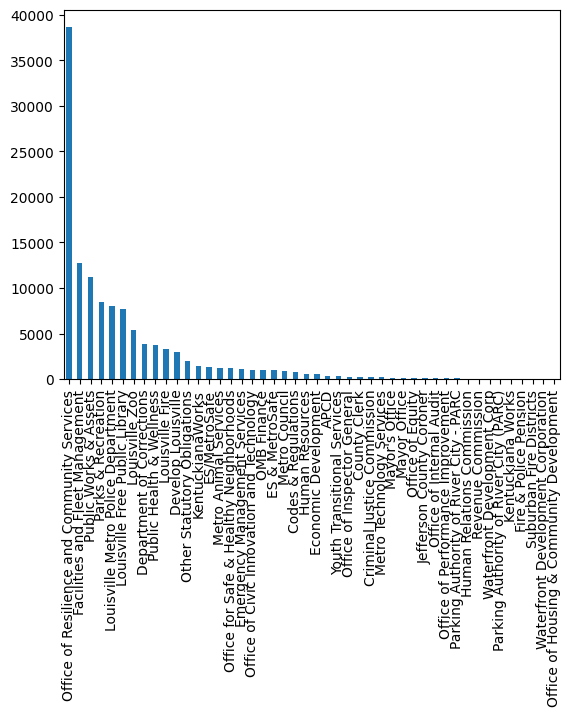

In [32]:
df['agency'].value_counts().plot.bar()

In [33]:
df['extended_amount'].sum().round(2)

326617558.42

In [38]:
police['extended_amount'].sum().round(2)

17169912.07

In [39]:
police.head()

,payee,payment_date,payment_number,agency,expenditure_type,expenditure_category,spend_category,cost_center,project,program,grant_,fund,financing_source,region,extended_amount
73360,PAUL MILLER FORD INC DBA PAUL MILLER FORD MAZDA,1/12/2023,1197575,Facilities and Fleet Management,Capital,NaN,Vehicles Light Trucks General Transp Use,245 Vehicles Capital,ORD 084 SERIES 2022 Police Fleet,NaN,NaN,Debt Service,FY23 NOTE,NaN,1918500.0
95076,PAUL MILLER FORD INC DBA PAUL MILLER FORD MAZDA,1/12/2023,1197575,Facilities and Fleet Management,Capital,NaN,Vehicles Light Trucks General Transp Use,245 Vehicles Capital,ORD 084 SERIES 2022 Police Fleet,NaN,NaN,Debt Service,FY23 NOTE,NaN,1918500.0
116430,ZENCITY TECHNOLOGIES US INC,2/22/2023,1201906,Louisville Metro Police Department,Operating,NaN,Professional Services,305 Administrative Bureau,NaN,NaN,NaN,1101 General Fund,NaN,NaN,196000.0
97506,ZENCITY TECHNOLOGIES US INC,2/22/2023,1201906,Louisville Metro Police Department,Operating,NaN,Professional Services,305 Administrative Bureau,NaN,NaN,NaN,1101 General Fund,NaN,NaN,196000.0
70764,GLADIATOR FORENSICS LLC,12/19/2022,1195906,Louisville Metro Police Department,Operating,NaN,Computer Hardware,305 ARP DC 3.16 Social Health: Community Viole...,NaN,NaN,GR00001808 ARP-0043-LMP,Grant Fund,NaN,NaN,173500.0


In [44]:
police['cost_center'].value_counts()

305 LMPD Training                                  4242
305 LMPD Major Crimes Division CIS                  382
305 Chief's Office Adm                              348
305 LMPD Agreements                                 305
305 Information Technology - Technical Services     226
                                                   ... 
370 DOC Administration                                1
610 OSHN Administration                               1
305 Grant (Highway Safety Program)                    1
305 Port Security                                     1
370 Inmate Services                                   1
Name: cost_center, Length: 80, dtype: int64

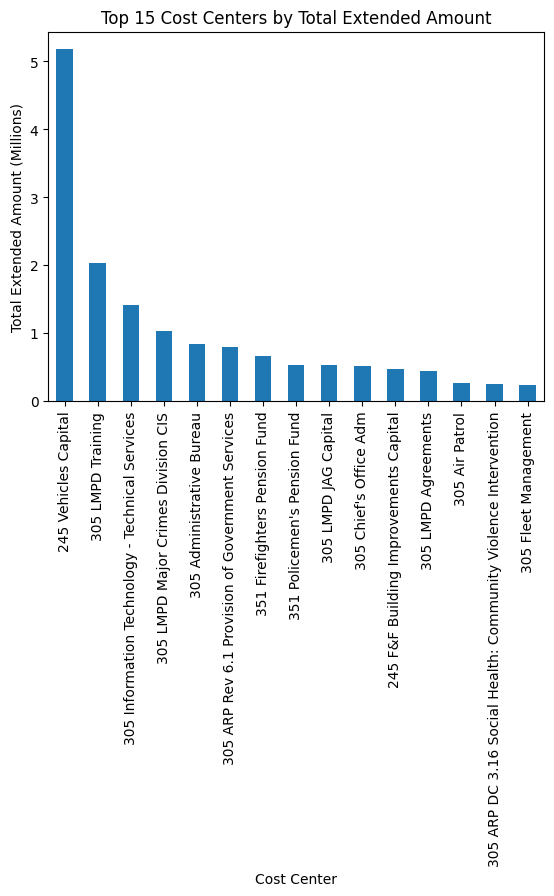

In [49]:
grouped_data = police.groupby('cost_center')['extended_amount'].sum()
top_15 = grouped_data.sort_values(ascending=False).head(15)


top_15_in_millions = top_15 / 1e6
top_15_in_millions.plot(kind='bar')
plt.xlabel('Cost Center')
plt.ylabel('Total Extended Amount (Millions)')
plt.title('Top 15 Cost Centers by Total Extended Amount')
plt.xticks(rotation=90)
plt.show()

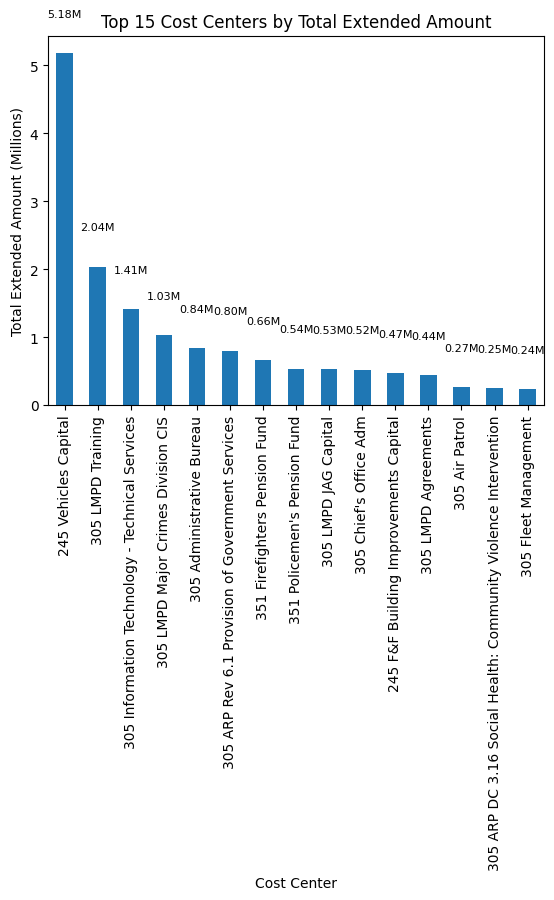

In [52]:
grouped_data = police.groupby('cost_center')['extended_amount'].sum()
top_15 = grouped_data.sort_values(ascending=False).head(15)

# Convert y-axis values to millions and create a bar plot
top_15_in_millions = top_15 / 1e6  # Convert to millions
ax = top_15_in_millions.plot(kind='bar')
plt.xlabel('Cost Center')
plt.ylabel('Total Extended Amount (Millions)')
plt.title('Top 15 Cost Centers by Total Extended Amount')
plt.xticks(rotation=90)

# Annotate the bars with the total amount spent
for i, v in enumerate(top_15_in_millions):
    ax.text(i, v + 0.5, f'{v:.2f}M', ha='center', va='bottom', fontsize=8)

plt.show()